# __Workshop 4, Advanced AI - Statistics Module__

## __CHALLENGE: Run and interpret a market regression model__

Now it’s time to use real data to better understand this model. Download monthly prices for Alfa (ALFAA.MX) and the Mexican market index IPCyC (^MXX) from Yahoo Finance from January 2018 to July 2022.

You have to do the following:

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib

import matplotlib.pyplot as plt

ALFA = pdr.get_data_yahoo(['ALFAA.MX', '^MXX'], start="01/01/2017", interval="m")
ALFA.head()

Attributes  Adj Close                    Close                     High  \
Symbols      ALFAA.MX          ^MXX   ALFAA.MX          ^MXX   ALFAA.MX   
Date                                                                      
2017-01-01  26.765945  47001.058594  27.059999  47001.058594  27.930000   
2017-02-01  25.410831  46856.789062  25.690001  46856.789062  27.459999   
2017-03-01  27.102251  48541.558594  27.400000  48541.558594  28.600000   
2017-04-01  25.621073  49261.328125  25.870001  49261.328125  27.840000   
2017-05-01  26.660969  48788.441406  26.920000  48788.441406  28.000000   

Attributes                      Low                     Open                \
Symbols             ^MXX   ALFAA.MX          ^MXX   ALFAA.MX          ^MXX   
Date                                                                         
2017-01-01  48632.511719  24.559999  45314.578125  25.700001  45642.800781   
2017-02-01  48115.980469  24.799999  46587.929688  27.459999  47001.968750   
2017-03-01  49523.941406  25.520000  46597.578125  25.680000  46853.671875   
2017-04-01  50147.039062  24.410000  48335.980469  27.260000  48549.230469   
2017-05-01  50154.328125  25.200001  48146.000000  25.870001  49260.121094   

Attributes       Volume                
Symbols        ALFAA.MX          ^MXX  
Date                                   
2017-01-01  139872067.0  3.957118e+09  
2017-02-01  184488776.0  3.659561e+09  
2017-03-01  202325523.0  4.039193e+09  
2017-04-01  108813980.0  2.720546e+09  
2017-05-01  225130578.0  3.589383e+09

- Calculate cc returns of both stocks and drop NA values

In [2]:
prices = ALFA['Adj Close']

r = np.log(prices) - np.log(prices.shift(1))
r = r.dropna()
r.columns = ['ALFAA.MX', '^MXX']

- Do a scatter plot including the regression line and interpret the plot

Text(0, 0.5, 'ALFA returns')

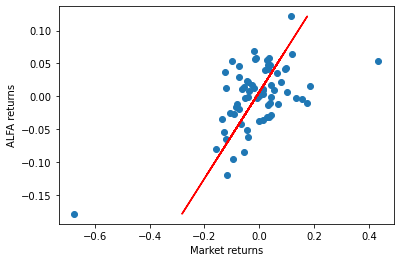

In [3]:
x =  r['^MXX']
y = r['ALFAA.MX']
plt.scatter(y, x)

b1, b0 = np.polyfit(x, y, 1)
yfit = b0 + b1*x

plt.plot(yfit, x, c='r')

plt.xlabel('Market returns')
plt.ylabel('ALFA returns')

- Run the market regression model (the Y=stock return, the X=market return). You can use the function OLS from the statsmodels.api library.

In [4]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = sm.add_constant(x)

results = results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAA.MX   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     34.41
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.58e-07
Time:                        19:40:08   Log-Likelihood:                 59.457
No. Observations:                  68   AIC:                            -114.9
Df Residuals:                      66   BIC:                            -110.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0101      0.012     -0.816      0.4

- Write down the regression equation

The regression equation is: E[ALFAret]= -0.007785460330175878 + 1.5394835507302118*MXXret.

- Interpret the beta coefficients and their corresponding t and p values, and their 95% confidence intervals

Note that the regression function in Python automatically performs hypothesis testing for both coefficients,  and , where the null hypotheses are that the coefficients are equal to zero.

DE LA TABLA OBTENIDA PODEMOS OBSERVAR LAS 2 BETAS, DE ESTAS PODEMOS DEDUCIR SUS COEFICIENTES CORRESPONDIENTES, NUESTRO PVALUE COMPRUEBA LA HIPÓTESIS NULA DE QUE EL COEFICIENTE ES IGUAL A 0, ÓSEA QUE NO TIENE EFECTO CUANDO ESTE ES MUY BAJO (<0.05) NOS INDICA QUE PODEMOS RECHAZAR LA HIPÓTESIS NULA. MIENTRAS QUE NUESTRA T NOS REPRESENTA EL NUMERO DE DESVIACIONES ESTÁNDAR QUE SE PUEDEN DAR PARA CADA UNA DE LAS BETAS.